# Changing Specificity x 2


In [23]:
from import_helper import causalinfo
from causalinfo import *


In [24]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [25]:
def merge1(i1, i2, o1):
    if i1:
        # Perfect spec
        o1[i2] = 1.0
    else:
        o1[i2/2] = 1.0

In [26]:
c1, s1, s3, a = make_variables('C1 S1 S3 A', 4)
c2, s2 = make_variables('C2 S2', 2)

In [30]:
eq1 = Equation('Send1', [c1], [s1], mappings.f_same)
eq2 = Equation('Send2', [c2], [s2], mappings.f_same)
eq3 = Equation('Rec1', [s2, s1], [a], merge1)
gr = CausalGraph([eq1, eq2, eq3])

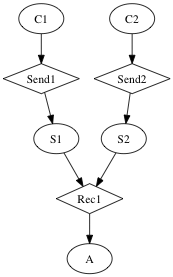

In [31]:
draw(gr.full_network)

In [32]:
eq3

Equation<Rec1>

In [34]:
root_dist = JointDist({c1: [.25] * 4, c2: [.2, .8]})
m = MeasureCause(gr, root_dist)

In [35]:
print m.causal_flow(s2, a, s1)
print m.average_sad(s2, a)

0.541446071166
0.541446071166


In [37]:
print m.causal_flow(s1, a, [s2])
print m.average_sad(s1, a)

1.8
1.8
